# أستكشاف بيانات الملف الأصلي 

# المرحلة التانية: المعالجة

# هندسة سمات: توحيد السمات: robust scaler

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
BC= pd.read_csv('bc_with_mis_90.csv')
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.0,23.0,0.8,3.4,1.0,2.0,1.0,124.0,69.12,8.02,3.4,4.60,13.4,500.0,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,400.0,22.0,0.7,NaN,9.6,3.0,7.0,133.0,51.82,7.91,4.4,5.00,12.5,NaN,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,450.0,27.0,0.6,3.5,9.3,11.0,17.0,155.0,50.00,8.74,5.1,4.46,12.5,456.0,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.0,15.0,1.1,4.2,8.5,13.0,1.0,NaN,40.11,10.34,3.1,4.33,13.8,600.0,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.0,2.0,1.0,3.0,8.0,7.0,13.0,125.0,67.63,7.31,4.2,4.13,1.7,543.0,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.0,28.0,0.7,5.9,9.5,63.0,23.0,234.0,21.00,1.12,3.9,5.23,11.3,288.0,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.0,32.0,0.8,10.2,8.8,82.0,23.0,190.0,21.37,2.02,4.8,4.57,13.2,249.0,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.0,15.0,0.6,11.4,8.1,22.0,15.0,143.0,8.50,0.50,4.4,4.32,11.1,249.0,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.0,29.0,0.9,10.9,8.2,51.0,17.0,104.0,NaN,NaN,4.5,4.41,12.9,293.0,13.0,254.0,147.5,3.15,107.5,1


In [3]:
#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.0,23.0,0.8,3.400000,1.0,2.0,1.0,124.000000,69.120000,8.020000,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,400.0,22.0,0.7,4.461508,9.6,3.0,7.0,133.000000,51.820000,7.910000,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,450.0,27.0,0.6,3.500000,9.3,11.0,17.0,155.000000,50.000000,8.740000,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.0,15.0,1.1,4.200000,8.5,13.0,1.0,140.701195,40.110000,10.340000,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.0,2.0,1.0,3.000000,8.0,7.0,13.0,125.000000,67.630000,7.310000,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.0,28.0,0.7,5.900000,9.5,63.0,23.0,234.000000,21.000000,1.120000,3.9,5.23,11.3,288.000000,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.0,32.0,0.8,10.200000,8.8,82.0,23.0,190.000000,21.370000,2.020000,4.8,4.57,13.2,249.000000,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.0,15.0,0.6,11.400000,8.1,22.0,15.0,143.000000,8.500000,0.500000,4.4,4.32,11.1,249.000000,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.0,29.0,0.9,10.900000,8.2,51.0,17.0,104.000000,30.967314,4.536407,4.5,4.41,12.9,293.000000,13.0,254.0,147.5,3.15,107.5,1


In [4]:
BC.isnull().sum()

Sex          0
Age          0
Adress       0
FBS          0
Urea         0
Creatinin    0
ALB          0
TCa          0
GPT          0
GOT          0
ALP          0
CA15         0
CEA          0
WBC          0
RBC          0
HGB          0
PLT          0
ESR          0
LDH          0
Na           0
K            0
CL           0
CLASS        0
dtype: int64

In [5]:
mean=BC.FBS.mean()
std = BC.FBS.std()
upper_limit_FBS = mean + std*3
lower_limit_FBS = mean - std*3


mean=BC.Urea.mean()
std = BC.Urea.std()
upper_limit_Urea = mean + std*3
lower_limit_Urea = mean - std*3

mean=BC.Creatinin.mean()
std = BC.Creatinin.std()
upper_limit_Creatinin = mean + std*3
lower_limit_Creatinin = mean - std*3

mean=BC.ALB.mean()
std = BC.ALB.std()
upper_limit_ALB = mean + std*3
lower_limit_ALB = mean - std*3

mean=BC.TCa.mean()
std = BC.TCa.std()
upper_limit_TCa = mean + std*3
lower_limit_TCa = mean - std*3


mean=BC.GPT.mean()
std = BC.GPT.std()
upper_limit_GPT = mean + std*3
lower_limit_GPT = mean - std*3

mean=BC.GOT.mean()
std = BC.GOT.std()
upper_limit_GOT = mean + std*3
lower_limit_GOT = mean - std*3

mean=BC.ALP.mean()
std = BC.ALP.std()
upper_limit_ALP = mean + std*3
lower_limit_ALP = mean - std*3


mean=BC.CA15.mean()
std = BC.CA15.std()
upper_limit_CA15 = mean + std*3
lower_limit_CA15 = mean - std*3


mean=BC.CEA.mean()
std = BC.CEA.std()
upper_limit_CEA = mean + std*3
lower_limit_CEA = mean - std*3

mean=BC.WBC.mean()
std = BC.WBC.std()
upper_limit_WBC = mean + std*3
lower_limit_WBC = mean - std*3

mean=BC.RBC.mean()
std = BC.RBC.std()
upper_limit_RBC = mean + std*3
lower_limit_RBC = mean - std*3


mean=BC.HGB.mean()
std = BC.HGB.std()
upper_limit_HGB = mean + std*3
lower_limit_HGB = mean - std*3


mean=BC.PLT.mean()
std = BC.PLT.std()
upper_limit_PLT = mean + std*3
lower_limit_PLT = mean - std*3

mean=BC.ESR.mean()
std = BC.ESR.std()
upper_limit_ESR = mean + std*3
lower_limit_ESR = mean - std*3

mean=BC.LDH.mean()
std = BC.LDH.std()
upper_limit_LDH = mean + std*3
lower_limit_LDH = mean - std*3


mean=BC.Na.mean()
std = BC.Na.std()
upper_limit_Na = mean + std*3
lower_limit_Na = mean - std*3

mean=BC.K.mean()
std = BC.K.std()
upper_limit_K = mean + std*3
lower_limit_K = mean - std*3

mean=BC.CL.mean()
std = BC.CL.std()
upper_limit_CL = mean + std*3
lower_limit_CL = mean - std*3





In [6]:
BC_FBS_outlier = BC[(BC.FBS>upper_limit_FBS) | (BC.FBS<lower_limit_FBS)]
BC_FBS_outlier.shape

(50, 23)

In [7]:
BC_ALB_outlier = BC[(BC.ALB>upper_limit_ALB) | (BC.FBS<lower_limit_ALB)]
BC_ALB_outlier.shape

(60, 23)

In [8]:
BC_CA15_outlier = BC[(BC.CA15>upper_limit_CA15) | (BC.CA15<lower_limit_CA15)]
BC_CA15_outlier.shape

(3, 23)

In [9]:
BC_FBS_wo_outlier = BC[(BC.FBS<upper_limit_FBS) & (BC.FBS>lower_limit_FBS)]
BC_FBS_wo_outlier.shape

(2387, 23)

In [10]:
#assigning nan to the outliers

BC['FBS'].values[BC['FBS'] >upper_limit_FBS] = np.nan
BC['FBS'].values[BC['FBS'] < lower_limit_FBS] = np.nan

BC['Urea'].values[BC['Urea'] >upper_limit_Urea] = np.nan
BC['Urea'].values[BC['Urea'] < lower_limit_Urea] = np.nan

BC['Creatinin'].values[BC['Creatinin'] >upper_limit_Creatinin] = np.nan
BC['Creatinin'].values[BC['Creatinin'] < lower_limit_Creatinin] = np.nan

BC['ALB'].values[BC['ALB'] >upper_limit_ALB] = np.nan
BC['ALB'].values[BC['ALB'] < lower_limit_ALB] = np.nan

BC['TCa'].values[BC['TCa'] >upper_limit_TCa] = np.nan
BC['TCa'].values[BC['TCa'] < lower_limit_TCa] = np.nan

BC['GPT'].values[BC['GPT'] >upper_limit_GPT] = np.nan
BC['GPT'].values[BC['GPT'] < lower_limit_GPT] = np.nan

BC['GOT'].values[BC['GOT'] >upper_limit_GOT] = np.nan
BC['GOT'].values[BC['GOT'] < lower_limit_GOT] = np.nan

BC['ALP'].values[BC['ALP'] >upper_limit_ALP] = np.nan
BC['ALP'].values[BC['ALP'] < lower_limit_ALP] = np.nan

BC['CA15'].values[BC['CA15'] >upper_limit_CA15] = np.nan
BC['CA15'].values[BC['CA15'] < lower_limit_CA15] = np.nan

BC['CEA'].values[BC['CEA'] >upper_limit_CEA] = np.nan
BC['CEA'].values[BC['CEA'] < lower_limit_CEA] = np.nan

BC['WBC'].values[BC['WBC'] >upper_limit_WBC] = np.nan
BC['WBC'].values[BC['WBC'] < lower_limit_WBC] = np.nan

BC['RBC'].values[BC['RBC'] >upper_limit_RBC] = np.nan
BC['RBC'].values[BC['RBC'] < lower_limit_RBC] = np.nan

BC['HGB'].values[BC['HGB'] >upper_limit_HGB] = np.nan
BC['HGB'].values[BC['HGB'] < lower_limit_HGB] = np.nan

BC['PLT'].values[BC['PLT'] >upper_limit_PLT] = np.nan
BC['PLT'].values[BC['PLT'] < lower_limit_PLT] = np.nan

BC['ESR'].values[BC['ESR'] >upper_limit_ESR] = np.nan
BC['ESR'].values[BC['ESR'] < lower_limit_ESR] = np.nan

BC['LDH'].values[BC['LDH'] >upper_limit_LDH] = np.nan
BC['LDH'].values[BC['LDH'] < lower_limit_LDH] = np.nan

BC['Na'].values[BC['Na'] >upper_limit_Na] = np.nan
BC['Na'].values[BC['Na'] < lower_limit_Na] = np.nan

BC['K'].values[BC['K'] >upper_limit_K] = np.nan
BC['K'].values[BC['K'] < lower_limit_K] = np.nan

BC['CL'].values[BC['CL'] >upper_limit_CL] = np.nan
BC['CL'].values[BC['CL'] < lower_limit_CL] = np.nan

In [11]:
BC.isnull().sum()

Sex           0
Age           0
Adress        0
FBS          50
Urea         66
Creatinin    27
ALB          60
TCa           8
GPT          61
GOT          43
ALP          28
CA15          3
CEA           1
WBC          13
RBC           4
HGB           3
PLT           3
ESR          30
LDH          12
Na            1
K             8
CL            3
CLASS         0
dtype: int64

In [12]:
#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.00000,23.0,0.8,3.400000,1.0,2.000000,1.0,124.000000,69.120000,8.020000,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,154.36173,22.0,0.7,4.461508,9.6,3.000000,7.0,133.000000,51.820000,7.910000,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,154.36173,27.0,0.6,3.500000,9.3,11.000000,17.0,155.000000,50.000000,8.740000,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.00000,15.0,1.1,4.200000,8.5,13.000000,1.0,140.701195,40.110000,10.340000,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.00000,2.0,1.0,3.000000,8.0,7.000000,13.0,125.000000,67.630000,7.310000,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.00000,28.0,0.7,5.900000,9.5,13.882247,23.0,234.000000,21.000000,1.120000,3.9,5.23,11.3,288.000000,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.00000,32.0,0.8,10.200000,8.8,13.882247,23.0,190.000000,21.370000,2.020000,4.8,4.57,13.2,249.000000,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.00000,15.0,0.6,11.400000,8.1,22.000000,15.0,143.000000,8.500000,0.500000,4.4,4.32,11.1,249.000000,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.00000,29.0,0.9,10.900000,8.2,51.000000,17.0,104.000000,30.967314,4.536407,4.5,4.41,12.9,293.000000,13.0,254.0,147.5,3.15,107.5,1


In [13]:
BC.isnull().sum()

Sex          0
Age          0
Adress       0
FBS          0
Urea         0
Creatinin    0
ALB          0
TCa          0
GPT          0
GOT          0
ALP          0
CA15         0
CEA          0
WBC          0
RBC          0
HGB          0
PLT          0
ESR          0
LDH          0
Na           0
K            0
CL           0
CLASS        0
dtype: int64

In [14]:
BC['Adress'] = BC['Adress'].replace(["Tripoli", "Algofra", "Benwalid", "Temcian","Alzwia-Algrbia", "Tegee", "Alagialt", "BenGawoad", 
         "Agdabia", "Zwoarha", "ALzentan", "Graian", "Benghazi", "Subrath"], 'Other')

BC['Adress'] = BC['Adress'].replace(["Sabha","sabha", "Alzeegan"], 'Sabha')
BC['Adress'] = BC['Adress'].replace(["Obaree-center","GaberOan","Gath"], 'Obaree')
BC['Adress'] = BC['Adress'].replace(["Morzek","Zoiwela","Godoha","Algatroon","Magdool","Wade-atebah","OmAlrianb","Temaciha","Tragan"], 'Morzek')



In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = BC.columns.tolist()
for column in cols:
    if BC[column].dtype == 'object':
        BC[column] = le.fit_transform(BC[column])


In [16]:
X=BC.drop(["CLASS","CL","Na","K"],axis=1)
y=BC["CLASS"]  

In [17]:
from sklearn.model_selection import train_test_split 

## spilt
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=0) 


In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer,RobustScaler


In [19]:
std = RobustScaler()
X_std_train = std.fit_transform(X_train)
X_std_test = std.fit_transform(X_test)



In [20]:
X_std_train

array([[ 0.        , -0.73333333,  0.        , ...,  0.05722819,
        -1.56804367,  0.00193837],
       [ 0.        , -0.33333333, -1.        , ..., -1.26277181,
         0.0293063 , -0.5026738 ],
       [ 0.        , -0.73333333,  0.        , ..., -0.34777181,
        -1.56804367,  0.00193837],
       ...,
       [ 0.        ,  0.06666667, -1.33333333, ...,  0.        ,
        -1.26936869,  0.        ],
       [ 0.        ,  0.13333333,  0.        , ...,  0.        ,
        -1.79204991, -1.64705882],
       [ 0.        ,  0.6       , -1.33333333, ..., -1.40277181,
         0.74668746,  0.27807487]])

In [21]:
X_std_test

array([[ 1.        ,  0.21428571, -1.        , ..., -0.74214327,
        -0.0720258 , -1.92959596],
       [ 0.        , -0.07142857, -0.33333333, ..., -1.42692588,
        -0.6984127 , -1.9184539 ],
       [ 0.        ,  0.28571429, -1.        , ...,  0.63285673,
        -0.19047619,  1.05647646],
       ...,
       [ 0.        ,  0.14285714, -1.        , ...,  0.63285673,
         2.53968254,  1.15675501],
       [ 0.        , -0.64285714,  0.        , ...,  0.15459586,
         0.02491963, -1.77360711],
       [ 0.        , -1.21428571,  0.        , ..., -0.00301284,
        -0.63492063,  0.95619791]])

In [22]:
## قبل الضبط البارميترات

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(X_std_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [23]:
y_pred=D_classifier.predict_proba(X_std_test)[:,1]
new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)


In [24]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8622950819672132

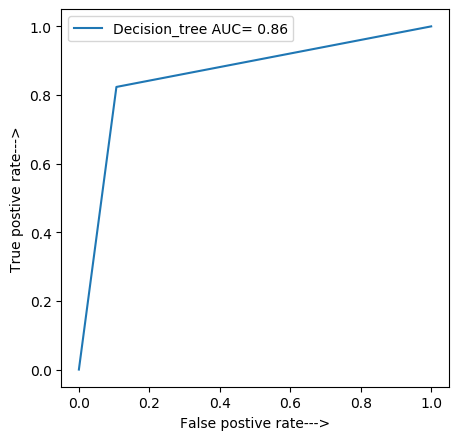

In [25]:
## AUC RUC
from sklearn.metrics import roc_curve,auc

dec_fpr,dec_tpr,threshold=roc_curve(y_test,new_y)
auc_dec=auc(dec_fpr,dec_tpr)

plt.figure(figsize=(5,5),dpi=100)
plt.plot(dec_fpr,dec_tpr,linestyle='-',label='Decision_tree AUC=% 0.2f' % auc_dec)

plt.xlabel('False postive rate--->')
plt.ylabel('True postive rate--->')

plt.legend()
plt.show()




In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,new_y,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,new_y,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.1377049180327869
mean_squared_error is = 0.3710861329028436


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8622950819672132
[[302  36]
 [ 48 224]]


Text(33.0, 0.5, 'Acutl')

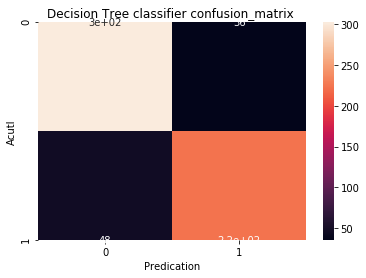

In [27]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(X_std_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [28]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(X_std_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       338
           1       0.86      0.82      0.84       272

    accuracy                           0.86       610
   macro avg       0.86      0.86      0.86       610
weighted avg       0.86      0.86      0.86       610

accuracy_score= 0.8622950819672132
